Name: Haoyuan Chen; ID: 1664352

Prove if f(x,y) = f_1(x)f_2(y), then B/D = A/C, where A,B,C,D denote the number of data points in selected regions.

In the case of continuous distribution, the number of data points can be seen as the double integral over the distribution, 
and if the two variables x,y are not correlated, the double integral can be seperated into the product of integrals of each variable, where
B = integral from 0 to x_0 (dx*f_1(x)) * integral from y_0 to infinity (dy*f_2(y))
D = integral from 0 to x_0 (dx*f_1(x)) * inegral from 0 to y_0 (dy*f_2(y))
A = integral from x_0 to infinity (dx*f_1(x)) * integral from y_0 to infinity (dy*f_2(y))
C = integral from x_0 to infinity (dx*f_1(x)) * integral from 0 to y_0 (dy*f_2(y))
B/D = integral from y_0 to infinity (dy*f_2(y)) / integral from 0 to y_0 (dy*f_2(y)) = A/C

In [174]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import math

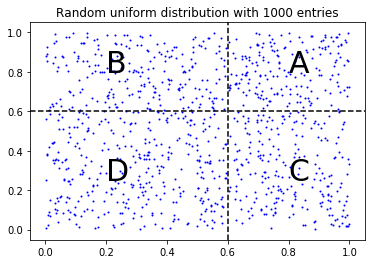

In [175]:
#create a random,flat distribution and seperate it into 4 different areas
data_x = np.random.sample(1000)
data_y = np.random.sample(1000)
points = np.column_stack((data_x,data_y))
plt.scatter(data_x,data_y,c='b',s=1)
plt.axvline(x=0.6,c='k',ls='--')
plt.axhline(y=0.6,c='k',ls='--')
plt.text(0.2,0.8,'B',fontsize=30)
plt.text(0.8,0.8,'A',fontsize=30)
plt.text(0.2,0.25,'D',fontsize=30)
plt.text(0.8,0.25,'C',fontsize=30)
plt.title('Random uniform distribution with 1000 entries')
plt.show()

In [176]:
#count number of data points in each region and calculate the difference between predicted number and actual number
Path_A = np.array([[0.6,0.6,1,1],[1,0.6,1,0.6]]).T
Path_B = np.array([[0,0,0.6,0.6],[1,0.6,1,0.6]]).T
Path_D = np.array([[0,0,0.6,0.6],[0.6,0,0.6,0]]).T
Path_C = np.array([[0.6,0.6,1,1],[0.6,0,0.6,0]]).T
Region_A = mpath.Path(Path_A)
Region_B = mpath.Path(Path_B)
Region_D = mpath.Path(Path_D)
Region_C = mpath.Path(Path_C)
Point_A = points[Region_A.contains_points(points)]
Point_B = points[Region_B.contains_points(points)]
Point_D = points[Region_D.contains_points(points)]
Point_C = points[Region_C.contains_points(points)]
Num_A = len(Point_A)
Num_B = len(Point_B)
Num_C = len(Point_C)
Num_D = len(Point_D)
Num_A_pred = (Num_B / Num_D) * Num_C
print('Actual number of data points in region A:',Num_A)
print('Predicted number of data points in region A:',Num_A_pred)

Actual number of data points in region A: 91
Predicted number of data points in region A: 70.0


In [177]:
#define a function that create a random uniform distribution
def create_random(size):
    data_x = np.random.sample(size)
    data_y = np.random.sample(size)
    distr = np.column_stack((data_x,data_y))
    return distr;

#define a function to deal with the situation of division by zero(in the case of statistic size = 10, sometimes D = 0)
def divby0(a,b):
    if b > 0:
        return a / b
    else:
        return a;
    
#define a function that calculate the absolute difference between the predicted A and actual A
#the number of data points is counted by define a path and use contains point method
def count_difference(x_c,y_c,data):
    Path_A = np.array([[x_c,x_c,1,1],[1,y_c,1,y_c]]).T
    Path_B = np.array([[0,0,x_c,x_c],[1,y_c,1,y_c]]).T
    Path_C = np.array([[x_c,x_c,1,1],[y_c,0,y_c,0]]).T
    Path_D = np.array([[0,0,x_c,x_c],[y_c,0,y_c,0]]).T
    Region_A = mpath.Path(Path_A)
    Region_B = mpath.Path(Path_B)
    Region_C = mpath.Path(Path_C)
    Region_D = mpath.Path(Path_D)
    Point_A = data[Region_A.contains_points(data)]
    Point_B = data[Region_B.contains_points(data)]
    Point_C = data[Region_C.contains_points(data)]
    Point_D = data[Region_D.contains_points(data)]
    Num_A = len(Point_A)
    Num_B = len(Point_B)
    Num_C = len(Point_C)
    Num_D = len(Point_D)
    Num_A_Predicted = divby0(Num_B,Num_D) * Num_C
    return Num_A - Num_A_Predicted;

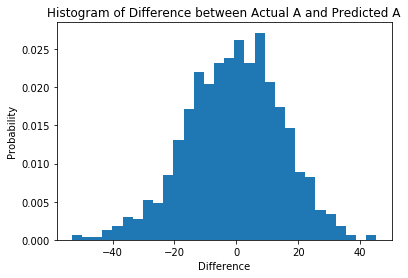

In [178]:
#Using a while loop to record the prediction error for 1000 runs and plot the corresponding histogram
count = 0
histo = np.zeros(1000)
while count < 1000:
    rdm = create_random(1000)
    dif = count_difference(0.6,0.6,rdm)  
    histo[count] = dif
    count = count + 1
plt.hist(histo,bins=30,density=True)
plt.title('Histogram of Difference between Actual A and Predicted A')
plt.xlabel('Difference')
plt.ylabel('Probability')
plt.show()

The distribution can be viewed as a Gaussian.  The reason that it looks like a Gaussian is that: 1st, we are counting some random events; 2nd, the mean value of the calculation is zero. In the diagram, we can see that the distribution is symmetric about difference = 0, which is the mean value of the distribution and shows that the data near mean value has larger probability to appear than other values. As proved at the begining, if f(x,y) = f_1(x)f_2(y), then A/C = B/D, so the mean value of the difference between estimation and actual value should be zero.

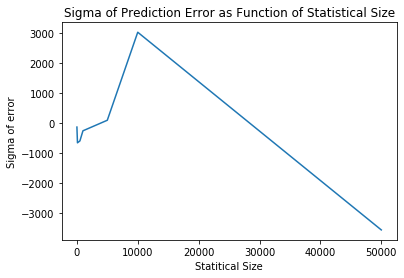

In [194]:
#Using a nested loop to record the sigma prediction error for 1000 runs of each statistical size and plot their relationship
stat_size = [10,100,500,1000,5000,10000,50000]
sig_err = np.zeros(7)
for x in stat_size:
    count = 0
    err = 0
    while count < 1000:
        rdm = create_random(x)
        dif = count_difference(0.6,0.6,rdm)
        err += dif
        count += 1
    sig_err[stat_size.index(x)] = err
plt.plot(stat_size,sig_err)
plt.title('Sigma of Prediction Error as Function of Statistical Size')
plt.xlabel('Statitical Size')
plt.ylabel('Sigma of error')
plt.show()

According to the plot, the sigma of prediction error increase as the statistical size increase. However, the prediction error is expected to decrease as the statistical size increase, since the approximation should be more accurate with larger size. One possible reason may be that larger size causes the number of data points to grow, leaving the percent error to be smaller but the numerical error to be larger. 

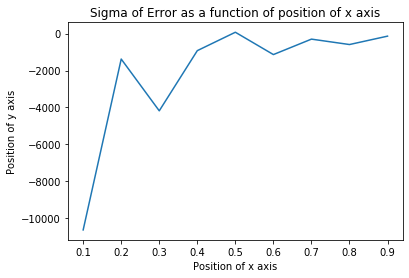

In [205]:
#Using a nested loop to record the sigma of prediction erro for 1000 runs for different x coordinate of central point
count = 0
x_axs = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
sig_err2 = np.zeros(9)
for x in x_axs:
    count = 0
    err = 0
    while count < 1000:
        rdm = create_random(1000)
        dif = count_difference(x,0.5,rdm)
        err += dif
        count = count + 1
    sig_err2[x_axs.index(x)] = err
plt.plot(x_axs,sig_err2)
plt.title('Sigma of Error as a function of position of x axis')
plt.xlabel('Position of x axis')
plt.ylabel('Position of y axis')
plt.show()